## learning-AI : deep learning application (61357002)
### assignment : abalone regression (ML)

**전복 데이터를 SVM, random forest, decision tree, logistic regression, KNN 기법을 적용하여 regression**

<br>

- **임규연 (lky473736)**
- 2024.09.11.에 문서 작성
- **dataset** : https://archive.ics.uci.edu/dataset/1/abalone
- **data abstract** : Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.  Further information, such as weather patterns and location (hence food availability) may be required to solve the problem. From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

------

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## ML

**아래 목차에 따라 regression을 진행한다.**
- **(1) 데이터 탐색적 분석 및 데이터 처리**
- **(2) regression (random search)**
    - KNR : random search
    - logistic regression : random search
    - decision tree : random search
    - random forest : random search
    - SVR : random search

<br>

-----

### (1) 데이터 탐색적 분석 및 데이터 처리

분류 전, 데이터의 전반적인 분포를 파악하고 regression 전략을 세운다. 또한 Z-score normalization, label encoding 등의 전처리를 수행한다.

- **데이터 구조 파악 및 EDA**
    - 각 feature가 의미하는 바를 분석, 결측치 파악 후 어떻게 regression 해야할지 진행하는 것이 탁월할 지 파악
    - 각 feature에 대한 사분위수, mean, max, min, median, corr
    - seaborn을 통한 corr 상관관계 및 histplot 시각화
    - 각 attribute에 대한 box plot 시각화 및 outlier 확인
    - 각 feature에 대한 histgram
- **데이터 전처리**
    - 결측치 제거 및 평균값으로 대체
    - Z-score normalization
    - label encoding으로 인한 label 평탄화
    - oversampling과 undersampling

In [13]:
# 파일 열기, df의 행 갯수, 열 갯수, 각 열 명 파악

df = pd.read_csv('../../data/abalone.csv')
print (df.columns)
df.info()
df.head()

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [14]:
# df의 기본적인 통계량 수치 파악, 각 열마다의 데이터 타입 

for feature in df.columns :
    print (f'{feature}의 데이터 타입 : ', df[feature].dtype)

df.describe()

id의 데이터 타입 :  int64
Sex의 데이터 타입 :  object
Length의 데이터 타입 :  float64
Diameter의 데이터 타입 :  float64
Height의 데이터 타입 :  float64
Whole_weight의 데이터 타입 :  float64
Shucked_weight의 데이터 타입 :  float64
Viscera_weight의 데이터 타입 :  float64
Shell_weight의 데이터 타입 :  float64
Rings의 데이터 타입 :  int64


,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,2088.000000,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,1205.940366,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1044.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,2088.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,3132.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,4176.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


이번 regression에서 얻어야 할 포인트는, **classification과 regression이 별 차이가 없다는 것이다.**

- **classification은 범주형 변수를 예측하는 것인데, 결국엔 범주형 변수를 매우 촘촘하게 해놓으면 regression과 다를 바가 없을 것이다.**
- 마치 **구분구적법**처럼, 특정 곡선의 넓이를 구하기 위해 매우 수많은 직사각형을 촘촘히 늘여놓으면 곡선의 오차가 0으로 다가가는 현상으로 이해해보자.

Rings 열을 Regression해보자.

In [15]:
# id열 제거 및 Sex 열을 string -> 수치 변환하기 위해 labelencoder로 변경

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df = df.drop('id', axis=1) # id열 제거
df['Sex'] = label_encoder.fit_transform(df['Sex']) # label encoding

print (df['Sex'].unique())

[2 0 1]


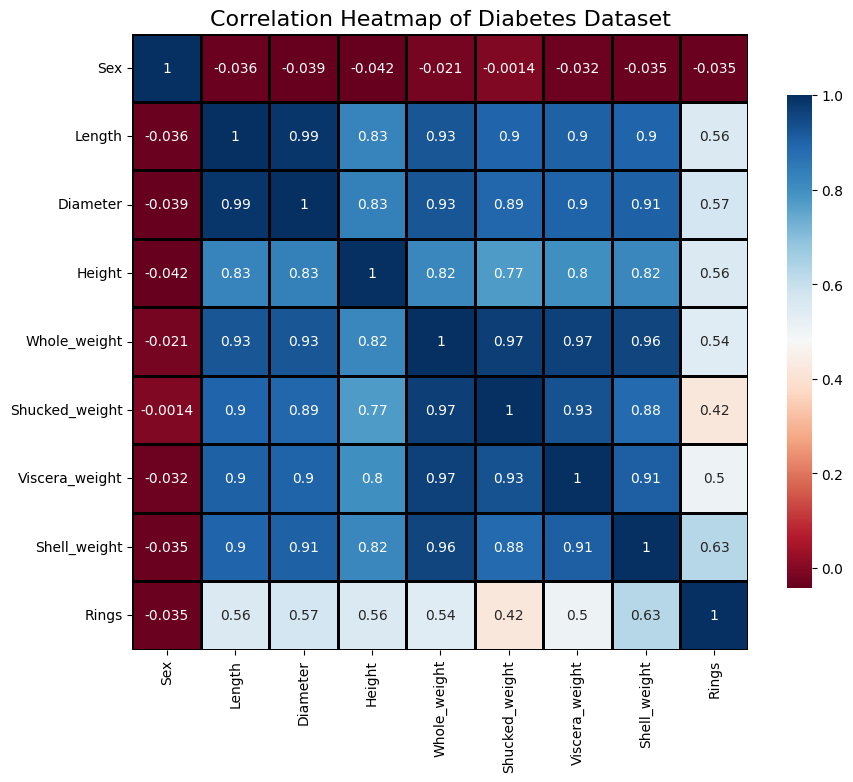

correlation for Sex:
Sex               1.000000
Shucked_weight   -0.001373
Whole_weight     -0.021391
Viscera_weight   -0.032067
Rings            -0.034627
Shell_weight     -0.034854
Length           -0.036066
Diameter         -0.038874
Height           -0.042077
Name: Sex, dtype: float64

correlation for Length:
Length            1.000000
Diameter          0.986812
Whole_weight      0.925261
Viscera_weight    0.903018
Shucked_weight    0.897914
Shell_weight      0.897706
Height            0.827554
Rings             0.556720
Sex              -0.036066
Name: Length, dtype: float64

correlation for Diameter:
Diameter          1.000000
Length            0.986812
Whole_weight      0.925452
Shell_weight      0.905330
Viscera_weight    0.899724
Shucked_weight    0.893162
Height            0.833684
Rings             0.574660
Sex              -0.038874
Name: Diameter, dtype: float64

correlation for Height:
Height            1.000000
Diameter          0.833684
Length            0.827554
Whole_

In [16]:
# seaborn을 통하여 heatmap 시각화
# 상관계수 행렬, 각 변수 간의 선형적 관계를 시각적으로 표시

correlation_matrix = df.corr() 
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', square=True,
            linewidths=1, linecolor='black', cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap of Abalone Dataset', fontsize=16)
plt.show()

for col in correlation_matrix.columns :
    sorted_corr = correlation_matrix[col].sort_values(ascending=False)
    print(f"correlation for {col}:")
    print(sorted_corr)
    print()

array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole_weight'}>,
        <Axes: title={'center': 'Shucked_weight'}>],
       [<Axes: title={'center': 'Viscera_weight'}>,
        <Axes: title={'center': 'Shell_weight'}>,
        <Axes: title={'center': 'Rings'}>]], dtype=object)

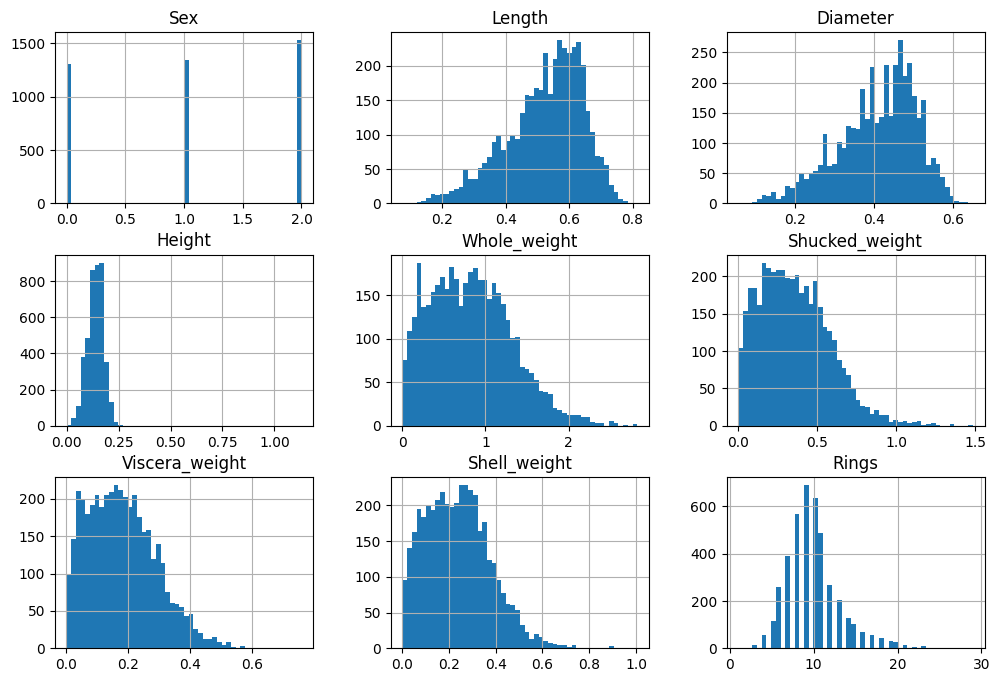

In [17]:
# histgram 시각화

df.hist(bins=50, figsize=(12, 8))

위 figure을 확인해보고 아래와 같은 생각을 하였다.

- 대부분 좌측 편향 분포를 띄고 있다. 이는 대부분의 전복들이 작다는 의미가 될 수 있다.
- **Rings를 잘 보면 연속적이지 않다. 원래는 classification이나, 초반에서도 언급했듯이 classification은 결국 regression으로 생각할 수 있다는 것이다.**

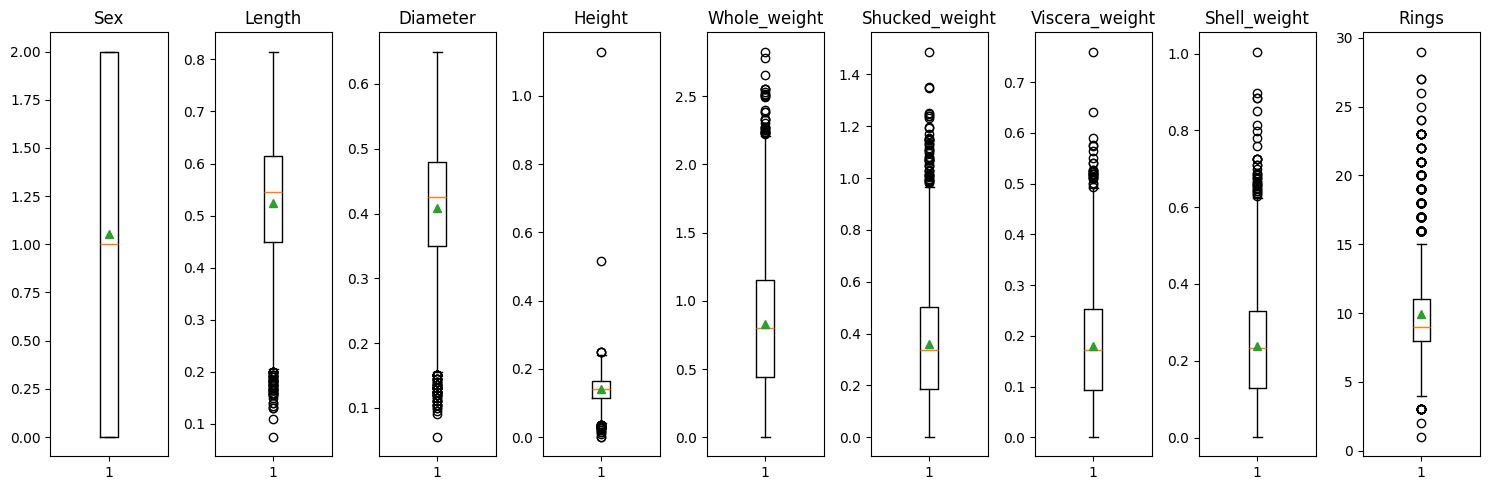

In [18]:
# box plot 그려 데이터 분포 확인

fig, axes = plt.subplots(nrows=1, ncols=df.shape[1], figsize=(15, 5))

for i, var in enumerate(df.columns) :
    ax = axes[i]
    ax.boxplot(df[var], showmeans=True)
    ax.set_title(var)

plt.tight_layout()
plt.show()

In [19]:
# Z-score normalization

from sklearn.preprocessing import StandardScaler

normalizier = StandardScaler()

feature = df[[feature for feature in df.columns if feature != 'Rings']]
label = df['Rings']

feature_scaled = normalizier.fit_transform(feature)

feature_scaled_df = pd.DataFrame(feature, columns=feature.columns)

feature_scaled_df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [20]:
# train set, test set, val set으로 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_scaled_df, label,
                                                   test_size=0.1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                   test_size=0.1) 

print ("train set : ", X_train.shape, y_train.shape)
print ("test set : ", X_test.shape, y_test.shape)
print ("val set : ", X_val.shape, y_val.shape)

train set :  (3383, 8) (3383,)
test set :  (418, 8) (418,)
val set :  (376, 8) (376,)


-----

### (2) random search를 통한 하이퍼파라미터 튜닝, regression

KNR, ridge, lasso, decision tree, random forest, SVR을 이용하여 regression을 수행한다. random search를 통하여 균등분포로 파라미터를 뽑아 가장 성능이 좋은 best_model을 추출해낼 것이다. 아래는 random search를 작동시킬 hyperparameter들의 range이다.


- **K-Nearest Neighbors (KNR)**
    - `n_neighbors`: `randint(1, 50)`
    - `weights`: `['uniform', 'distance']`
    - `p`: `randint(1, 2)` (1은 맨해튼 거리, 2는 유클리드 거리)

- **Support Vector Machine (SVM)**
    - `C`: `uniform(0.01, 100.0)`
    - `kernel`: `['linear', 'rbf']`
    - `gamma`: `['scale', 'auto']`

- **Decision Tree**
    - `max_features`: `['sqrt', 'log2', None]`
    - `max_depth`: `np.arange(5, 50, 5)`
    - `min_samples_leaf`: `np.arange(1, 50, 10)`
    - `criterion`: `['mse', 'mae']`

- **Random Forest**
    - `n_estimators`: `randint(50, 200)`
    - `max_depth`: `randint(1, 50)`
    - `min_samples_split`: `randint(2, 50)`
    - `min_samples_leaf`: `randint(1, 50)`
    - `bootstrap`: `[True, False]`

- **Ridge**
    - `alpha`: `uniform(0.01, 10.0)`
    - `solver`: `['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']`
    - `max_iter`: `randint(100, 1000)`

- **Lasso**
    - `alpha`: `uniform(0.01, 10.0)`
    - `max_iter`: `randint(100, 1000)`
    - `selection`: `['cyclic', 'random']`


In [21]:
# random search에 사용될 각 parameter의 scale을 dictionary로 정리
# model list 정의

from scipy.stats import uniform, randint
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

models = {
    "KNR": KNeighborsRegressor(),
    # "logistic regression": LogisticRegression(max_iter=1000),  # max_iter 기본값 설정
    "ridge" : Ridge(),
    "lasso" : Lasso(),
    "SVR": SVR(),
    "decision tree": DecisionTreeRegressor(),
    "random forest": RandomForestRegressor()
}

param_scale = {
    "KNR": {
        'n_neighbors': randint(1, 50),
        'weights': ['uniform', 'distance'],
        'p': randint(1, 2)
    },
    
    "logistic regression": {
        'C': uniform(0.01, 10.0),
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': randint(100, 1000)
    },
    
    "SVR": {
        'C': uniform(0.01, 100.0),
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    
    "decision tree": {
        'max_features': ['sqrt', 'log2', None],
        'max_depth': np.arange(5, 50, 5),
        'min_samples_leaf': np.arange(1, 50, 10),
        'criterion':['squared_error']
    },
    
    "random forest":  {
        'n_estimators': randint(50, 200),
        'max_depth': randint(1, 50),
        'min_samples_split': randint(2, 50),
        'min_samples_leaf': randint(1, 50),
        'bootstrap': [True, False]
    },
    
    "ridge" : {
        'alpha': uniform(0.01, 10.0),
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
        'max_iter': randint(100, 1000)
    },

    "lasso" : {
        'alpha': uniform(0.01, 10.0),
        'max_iter': randint(100, 1000),
        'selection': ['cyclic', 'random']
    }
}

여기서는 모든 모델을 순서대로 학습시키기 위하여, 사용자 지정함수를 생성하여 구현한다. 

- 여기서 사용자 지정 함수명은 **model_fit_procedurally**
    - 이전에 회귀 버전으로 작성한 https://github.com/lky473736/learning-AI/blob/main/report/vehicle/ML_regression_vehicle.ipynb 에서의 **model_fit_procedurally**와 logic은 동일하다.
- model_fit_procedurally의 paramter는 model_name, X_train, y_train, X_val, y_val, X_test, y_test이다.
    - model_name은 여기서 model의 이름을 의미한다. (models 딕셔너리에서 keys에 해당)
    - models를 model_name으로 접근할 예정, model의 api를 의미한다. (models 딕셔너리에서 values에 해당)
- **각 모델에 대해 random search -> best_model 도출 및 parameter 출력 + fit -> fit 후에 MSE 계산 및 출력 -> results에 MSE, r^2 저장 순으로 진행**
- random search의 scoring에 **neg_mean_squared_error**를 사용한다.
    - Reference : https://velog.io/@ann9902/%EC%95%99%EC%83%81%EB%B8%94
    - scikit-learn의 내부 원리에 의해, 높을 수록 좋은 효용 함수를 적용하기 때문에, MSE의 반대를 계산한다.

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

def model_fit_procedurally(model_name, X_train, y_train, X_val, y_val, X_test, y_test):
    # CAUTION!
    # 여기서 X_train, y_train ... <-- 이 set은 지역변수이므로, 기존 train set, val set, test set에 영향을 끼치지 않음
    
    print(f"************** Activated : {model_name} **************")
    
    random_search = RandomizedSearchCV(
        models[model_name], param_scale[model_name], 
        n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    # Random search 진행
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    
    # Train MSE, R^2
    y_train_pred = best_model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Validation MSE, R^2
    y_val_pred = best_model.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    # Test MSE, R^2
    y_test_pred = best_model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    result = {
        'train_mse': train_mse,
        'train_r2': train_r2,
        'val_mse': val_mse,
        'val_r2': val_r2,
        'test_mse': test_mse,
        'test_r2': test_r2
    }
    
    best_params = random_search.best_params_
    
    print(f"{model_name} | best params : {best_params}")
    print(f"{model_name} | train MSE : {train_mse}, R^2: {train_r2}")
    print(f"{model_name} | validation MSE : {val_mse}, R^2: {val_r2}")
    print(f"{model_name} | test MSE : {test_mse}, R^2: {test_r2}")
    
    return result, best_params, best_model


In [23]:
# fit

import time

results = {}

for model_name in models.keys() :
    start_time = time.time() # 각 모델별로 소요 시간 측정
    
    rst, _, best_model = model_fit_procedurally(model_name, 
                                          X_train, y_train,
                                          X_val, y_val,
                                          X_test, y_test)
    
    end_time = time.time()
    
    print ("turnaround time: ", end_time - start_time)
    print()
    
    results[model_name] = [rst]
    
    try : 
        results[model_name].append (best_model)
    except : 
        pass
    
print (results)

************** Activated : KNR **************
KNR | best params : {'n_neighbors': 14, 'p': 1, 'weights': 'distance'}
KNR | train MSE : 0.0, R^2: 1.0
KNR | validation MSE : 4.464213832525827, R^2: 0.543453776791371
KNR | test MSE : 5.015483231900816, R^2: 0.5421433362901994
turnaround time:  2.6696560382843018

************** Activated : ridge **************
ridge | best params : {'alpha': 0.6003313353867656, 'max_iter': 124, 'solver': 'sparse_cg'}
ridge | train MSE : 4.922434167874766, R^2: 0.5262765085436423
ridge | validation MSE : 4.940645318312416, R^2: 0.49473008128450147
ridge | test MSE : 5.022106448442452, R^2: 0.5415387118325812
turnaround time:  0.32239198684692383

************** Activated : lasso **************
lasso | best params : {'alpha': 0.02204502128734464, 'max_iter': 964, 'selection': 'random'}
lasso | train MSE : 5.580772127508269, R^2: 0.46291961109010327
lasso | validation MSE : 5.862751514805354, R^2: 0.40042812416522655
lasso | test MSE : 5.887717931807906, R^2

KNR
ridge
lasso
SVR
decision tree
random forest


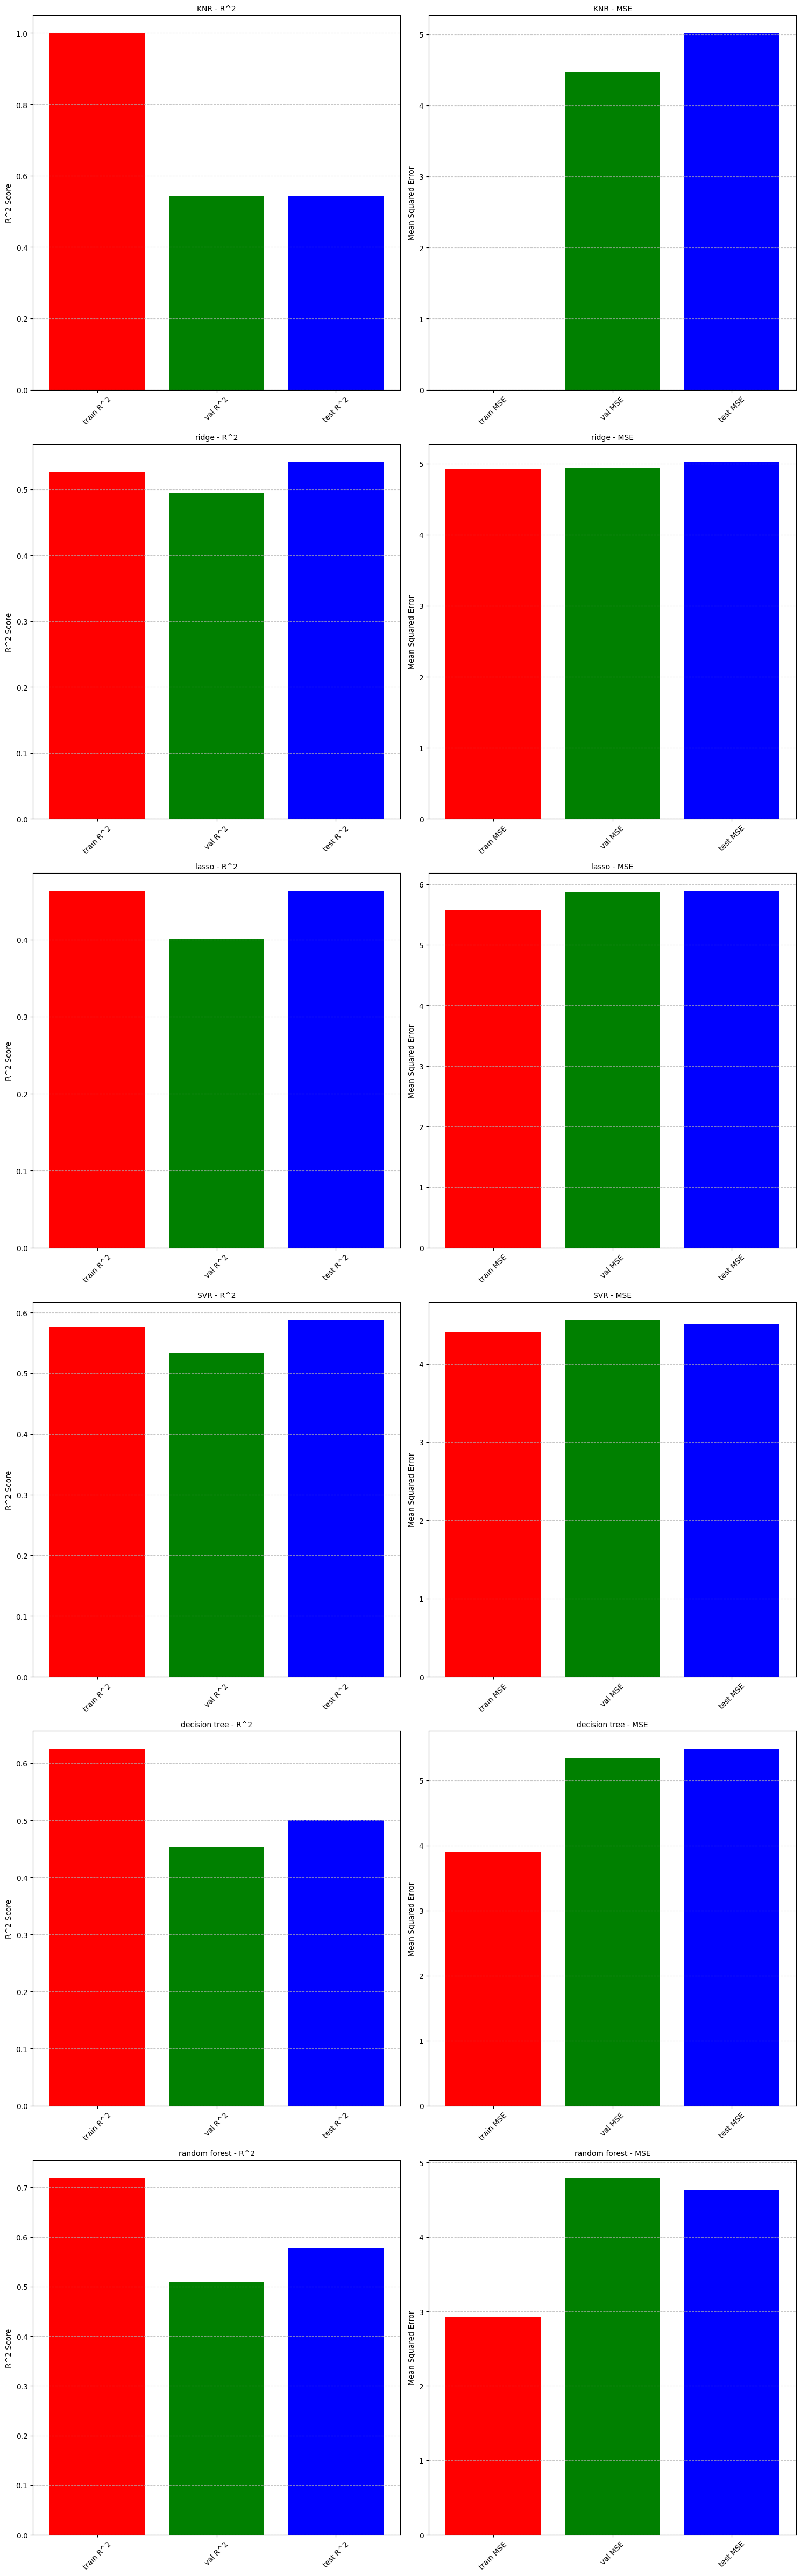

In [24]:
# visualization each acc, loss

import matplotlib.pyplot as plt

model_names = [name for name in models.keys()]
for name in model_names : 
    print (name)

fig, axes = plt.subplots(len(model_names), 2, figsize=(15, len(model_names) * 8))

for i, model in enumerate(model_names) :
    axes[i][0].bar(['train R^2', 'val R^2', 'test R^2'], 
                   [results[model][0]['train_r2'], 
                    results[model][0]['val_r2'], 
                    results[model][0]['test_r2']],
                  color=['r', 'g', 'b'])
    
    axes[i][0].set_title(f'{model} - R^2', fontsize=10)
    axes[i][0].set_ylabel('R^2 Score')
    axes[i][0].tick_params(axis='x', rotation=45)
    axes[i][0].grid(True, axis='y', linestyle='--', alpha=0.7)

    axes[i][1].bar(['train MSE', 'val MSE', 'test MSE'], 
                   [results[model][0]['train_mse'], 
                    results[model][0]['val_mse'], 
                    results[model][0]['test_mse']],
                   color=['r', 'g', 'b'])
    
    axes[i][1].set_title(f'{model} - MSE', fontsize=10)
    axes[i][1].set_ylabel('Mean Squared Error')
    axes[i][1].tick_params(axis='x', rotation=45)
    axes[i][1].grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


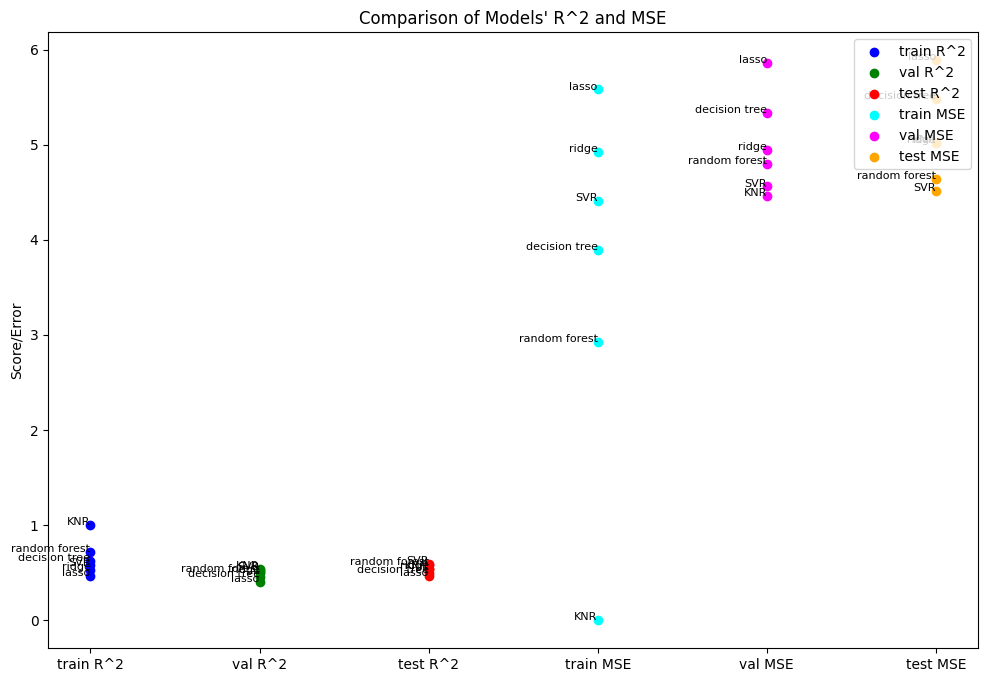

In [25]:
# scatter로 각 모델별로의 accuracy와 loss의 대소 비교 수행

train_r2 = [results[model][0]['train_r2'] for model in model_names]
val_r2 = [results[model][0]['val_r2'] for model in model_names]
test_r2 = [results[model][0]['test_r2'] for model in model_names]
train_mse = [results[model][0]['train_mse'] for model in model_names]
val_mse = [results[model][0]['val_mse'] for model in model_names]
test_mse = [results[model][0]['test_mse'] for model in model_names]

plt.figure(figsize=(12, 8))

# R^2
plt.scatter([1]*len(model_names), train_r2, color='blue', label='train R^2')
plt.scatter([2]*len(model_names), val_r2, color='green', label='val R^2')
plt.scatter([3]*len(model_names), test_r2, color='red', label='test R^2')

# MSE
plt.scatter([4]*len(model_names), train_mse, color='cyan', label='train MSE')
plt.scatter([5]*len(model_names), val_mse, color='magenta', label='val MSE')
plt.scatter([6]*len(model_names), test_mse, color='orange', label='test MSE')

for i, model in enumerate(model_names):
    plt.text(1, train_r2[i], model, fontsize=8, ha='right')
    plt.text(2, val_r2[i], model, fontsize=8, ha='right')
    plt.text(3, test_r2[i], model, fontsize=8, ha='right')
    plt.text(4, train_mse[i], model, fontsize=8, ha='right')
    plt.text(5, val_mse[i], model, fontsize=8, ha='right')
    plt.text(6, test_mse[i], model, fontsize=8, ha='right')

plt.xticks([1, 2, 3, 4, 5, 6], ['train R^2', 'val R^2', 'test R^2', 
                                 'train MSE', 'val MSE', 'test MSE']) # 축에 이름 붙이기
plt.title("Comparison of Models' R^2 and MSE")
plt.ylabel('Score/Error')
plt.legend(loc='upper right')
plt.show()
